In [6]:
from math import sin,cos,tan,asin,acos,atan,pi,sqrt,log
import numpy as np
import sympy as sy

mm=0.001

#知识重点
    #1.极惯性矩 J=int(r^2 dA)
    #2.tau=T*r/J
    #3.角度叠加
#问题题目
    #1.T2⭐
    #2.T4⭐
    #3.T5⭐⭐

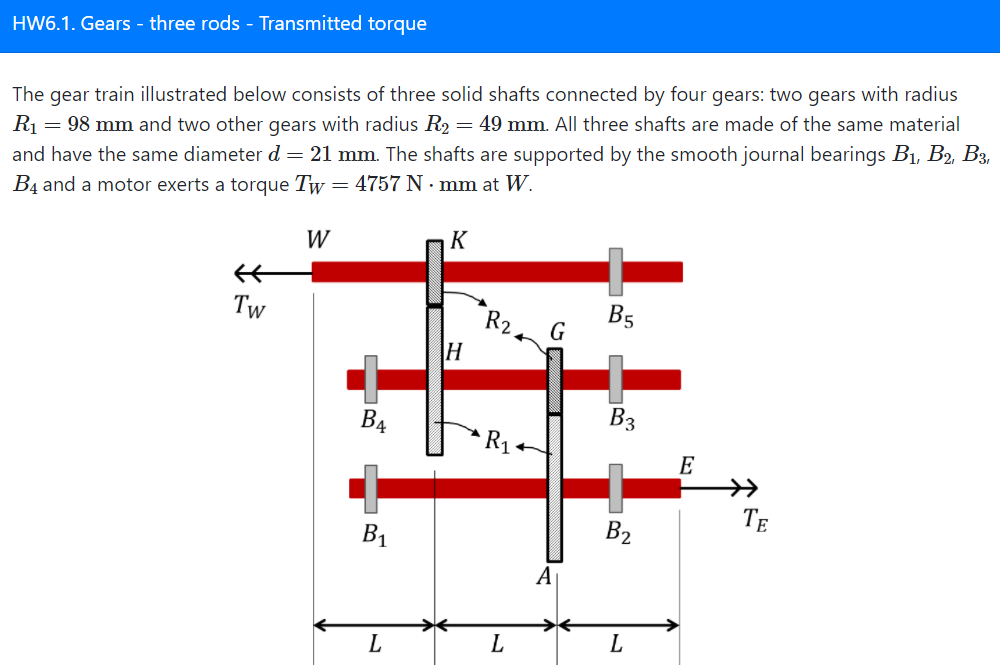

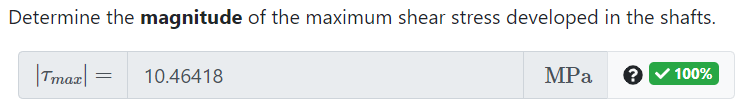

In [2]:
#
##########################复制内容
R1 = 90 # mm
R2 = 45 # mm
d = 22 # mm
TW = 4704 # N.mm
##########################复制内容

#单位转化
r1=R1*mm
r2=R2*mm
d*=mm
tw=TW*mm
r=d/2

#自定义计算圆的极惯性矩
def j(r):
    return pi/32*(2*r)**4

j1=j(r1)
j2=j(r2)
j=j(d/2)

#计算最大扭矩
t3=tw*(r1/r2)*(r1/r2)

t3*r/j/1000000

8.999727751215937

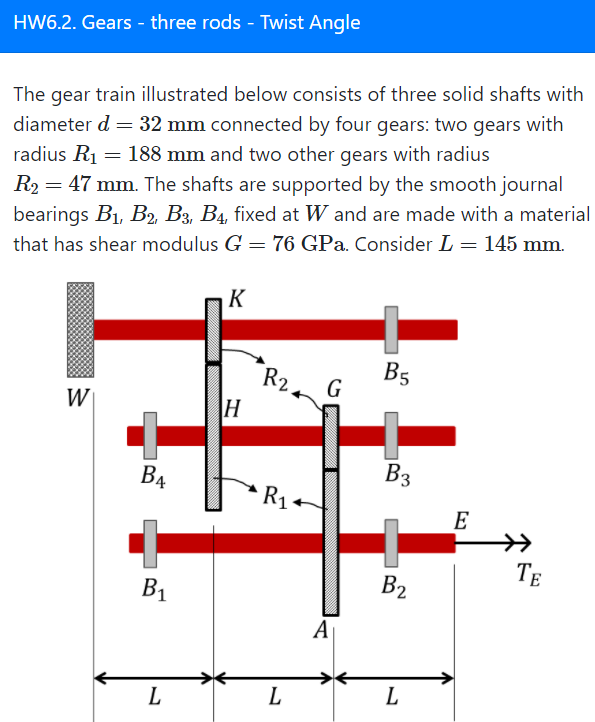

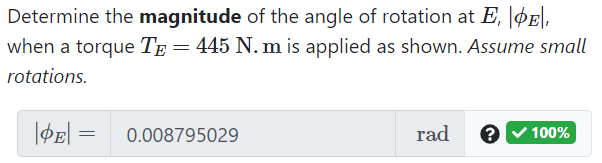

In [8]:
#⭐
##########################复制内容
d = 32 # mm
R1 = 188 # mm
R2 = 47 # mm
G = 76 # GPa
L = 145 # mm
TE = 445 # N.m
##########################复制内容

#单位转化
d=d*mm
r=d/2
r1=R1*mm
r2=R2*mm
G=G*1e9
L*=mm

#自定义计算圆的极惯性矩
def j(r):
    return pi/32*(2*r)**4

j1=j(r1)
j2=j(r2)
j=j(r)

#剪切模量→剪切系数
kt=G*j/L

#计算扭矩
T1=TE
T2=T1/r1*r2
T3=T2/r1*r2

#计算相对扭转角度
phi1=T1/kt
phi2=T2/kt
phi3=T3/kt

#计算扭转角度的叠加
delta=phi1+phi2*(r2/r1)+phi3*(r2/r1)**2
delta

0.008795029388980616

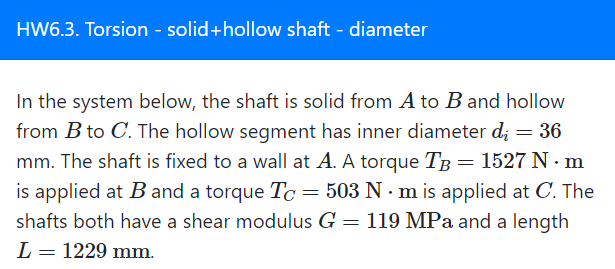

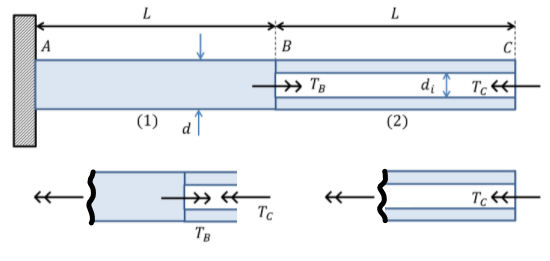

In [4]:
#本题重点
    #默认 internal torque 的方向

##########################复制内容
di = 27 # mm
TB = 1413 # N.m
TC = 447 # N.m
G = 110 # MPa
L = 1308 # mm
tauMax = 19 # MPa
##########################复制内容

#单位转化
di=di*mm
tb=TB
tc=TC
G=G*1e6
L=L*mm
tauMax*=1000000

#自定义计算圆的极惯性矩
def j(r):
    return pi/32*(2*r)**4

do=sy.S('do')
ro=do/2
j1=j(ro)

#注意默认内力矩方向朝外
t1=tb-tc
t2=-tc

#求解dr外径大小
equ1=tauMax-t1*ro/j1
d_v=sy.solve([equ1],[do])[0][0]

#剪切模量→剪切系数
j1=j1.subs(do,d_v)
j2=j1-j(di/2)
k1=G*j1/L
k2=G*j2/L

#计算旋转角度
angle1=t1/k1
angle2=t2/k2
angle=angle1+angle2

print('T1',t1)
print('T2',t2)
print('dr',d_v*1000)
print('angle',angle) 

T1 966
T2 -447
dr 63.7379187838344
angle 3.69967852216086


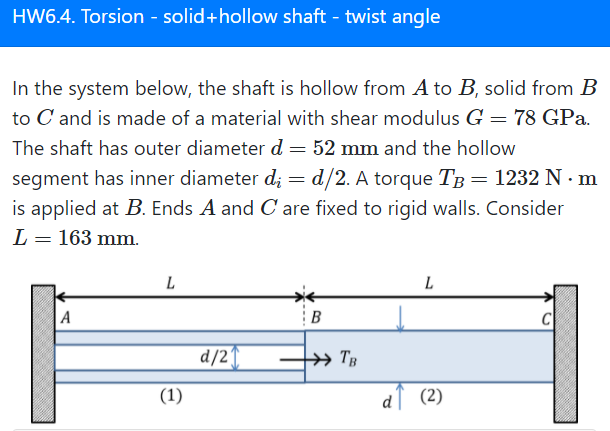

In [9]:
#⭐
#本题说明
    #两边的柱子都会产生扭矩

##########################复制内容
d = 53 # mm
L = 199 # mm
G = 59 # GPa
TB = 1459 # N.m
##########################复制内容

#单位转化
d*=mm
L*=mm
G=G*1e9

#自定义计算圆的极惯性矩
def j(r):
    return pi/32*(2*r)**4

j1=j(d/2)
j2=j1-j(d/4)

k1=G*j1/L
k2=G*j2/L

phi=sy.S('phi')

#力矩平衡 
equ=k1*phi+k2*phi-TB
sy.solve([equ],[phi])

{phi: 0.00327877241564846}

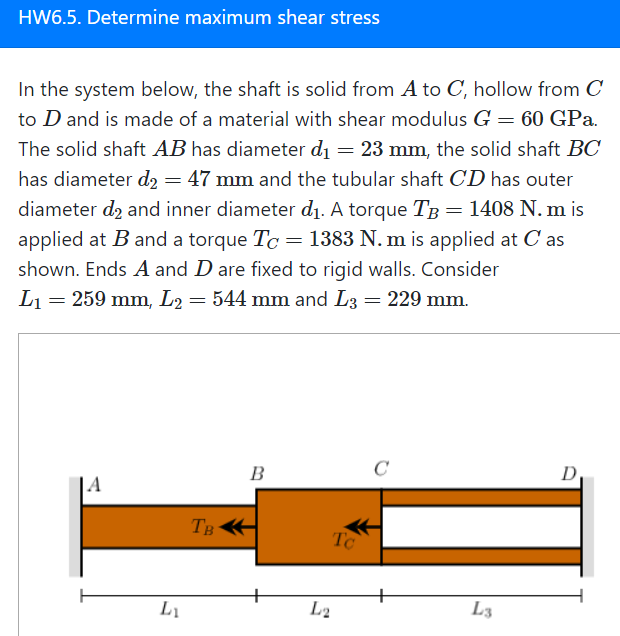

In [ ]:
#⭐⭐
#本题重点
    #除了图中标记的两处扭矩，其实两边的墙也会产生力矩
    #上一题加强版

##########################复制内容
import sympy as sy
mm=1e-3
from sympy import *

L1 = 259 # mm
L2 = 620 # mm
L3 = 283 # mm
d1 = 34 # mm
d2 = 59 # mm
G = 58 # GPa
Tb = 1259 # N.m
Tc = 1541 # N.m
##########################复制内容
ta,td=sy.S('ta,td')

#单位转化
l1=L1*mm
l2=L2*mm
l3=L3*mm
d1*=mm
d2*=mm
G=G*1e9

#自定义计算圆的极惯性矩
def j(r):
    return pi/32*(2*r)**4

j1=j(d1/2)
j2=j(d2/2)
j3=j2-j1

k1=G*j1/l1
k2=G*j2/l2
k3=G*j3/l3

r1=d1/2
r2=d2/2
r3=d2/2

#看图改方向
tb=Tb
tc=-Tc

#方程1→力矩平衡
equ1=ta+tb+tc+td #假设强产生的力矩都向右

#方程2→角度和=0
theta1=(ta)/k1
theta2=(ta+tb)/k2
theta3=(ta+tb+tc)/k3
equ2=theta1+theta2+theta3

#解方程
ans=sy.solve([equ1,equ2],[ta,td])
ta=ans[ta]
td=ans[td]

#计算stress 注意公式*r
s1=(ta)*r1/j1/1000000
s2=(ta+tb)*r2/j2/1000000
s3=(ta+tb+tc)*r3/j3/1000000

print('AB',abs(s1).evalf())
print('BC',abs(s2).evalf())
print('CD',abs(s3).evalf())

AB 27.2390519046389
BC 26.0076767888944
CD 13.7187564492940


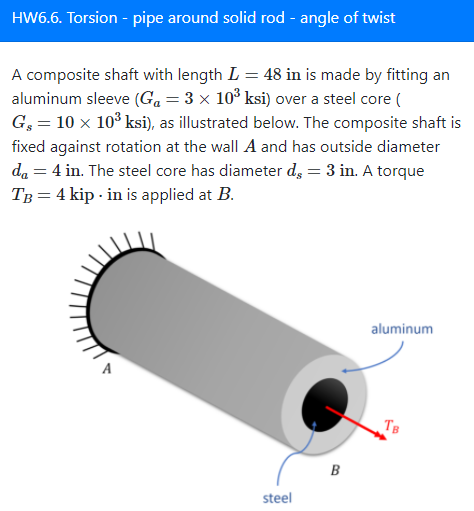

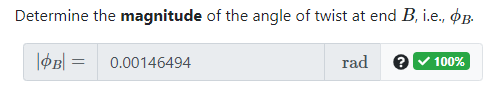

In [7]:
L = 48 # in
Ga = 3000 # ksi
Gs = 10000 # ksi
da = 4 # in
ds = 3 # in
Tb = 4 # kip.in

Tb=Tb*1000 ###注意单位
Ga=Ga*1000
Gs=Gs*1000

ja=j(da/2)-j(ds/2)
js=j(ds/2)

ka=Ga*ja/L
ks=Gs*js/L

phi=Tb/(ka+ks)
phi

0.0014649407795604568

In [12]:
L = 46 # in
Ga = 5000 # ksi
Gs = 10000 # ksi
da = 4 # in
ds = 3 # in
Tb = 1 # kip.in

Tb=Tb*1000 ###注意单位
Ga=Ga*1000
Gs=Gs*1000

ra=da/2
rs=ds/2

ja=j(da/2)-j(ds/2)
js=j(ds/2)

ka=Ga*ja/L
ks=Gs*js/L

phi=Tb/(ka+ks)

Ta=phi*ka*ra/ja/1000 ##注意tau的表达式=T*r/j
Ts=phi*ks*rs/js/1000

print(Ta,Ts)

0.06045054218327181 0.09067581327490773
